# Feature Scaling

**Why and Where to Apply Feature Scaling?**
Real world dataset contains features that highly vary in magnitudes, units, and range. Normalisation should be performed when the scale of a feature is irrelevant or misleading and not should Normalise when the the scale is meaningful.

**The algorithms which use Euclidean Distance measure are sensitive to Magnitudes. Here feature scaling helps to weigh all the features equally.**

Formally, If a feature in the dataset is big in scale compared to others then in algorithms where Euclidean distance is measured this big scaled feature becomes dominating and needs to be normalized.

Examples of Algorithms where Feature Scaling matters 
1. K-Means uses the Euclidean distance measure here feature scaling matters.
2. K-Nearest-Neighbours also require feature scaling.
3. Principal Component Analysis (PCA): Tries to get the feature with maximum variance, here too feature scaling is required.
4. Gradient Descent: Calculation speed increase as Theta calculation becomes faster after feature scaling.

Note: Naive Bayes, Linear Discriminant Analysis, and Tree-Based models are not affected by feature scaling.
In Short, any Algorithm which is Not Distance based is Not affected by Feature Scaling.

4 methods of feature scaling that are implemented in scikit-learn:

* StandardScaler
* MinMaxScaler
* RobustScaler

* Normalizer

## Standard Scaler

The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

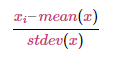

If data is not normally distributed, this is not the best scaler to use.


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

C:\Users\majain\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


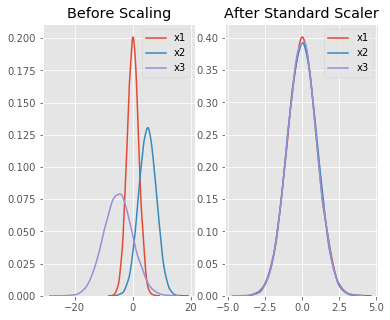

In [2]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

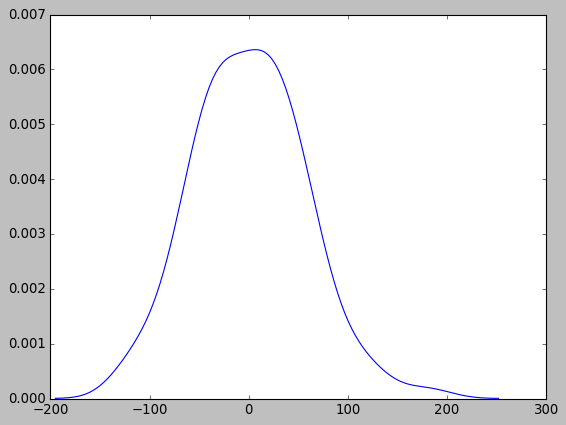

In [3]:
plt.style.use('classic')
sns.kdeplot(np.random.normal(0, 50, 100) , shade=False)

## Min-Max Scaler
The MinMaxScaler is the probably the most famous scaling algorithm, and follows the following formula for each feature:

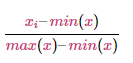

It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider the Robust Scaler below.

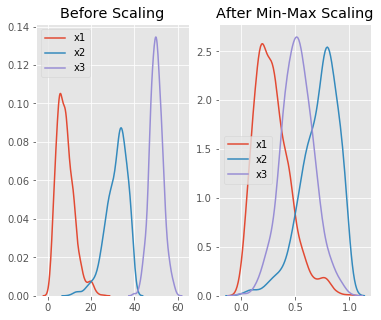

In [3]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

Notice that the skewness of the distribution is maintained but the 3 distributions are brought into the same scale so that they overlap.

## Robust Scaler
The RobustScaler uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rathar than the min-max, so that it is robust to outliers. Therefore it follows the formula:

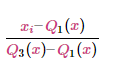

For each feature.

Of course this means it is using the less of the data for scaling so it’s more suitable for when there are outliers in the data.

Let’s take a look at this one in action on some data with outliers

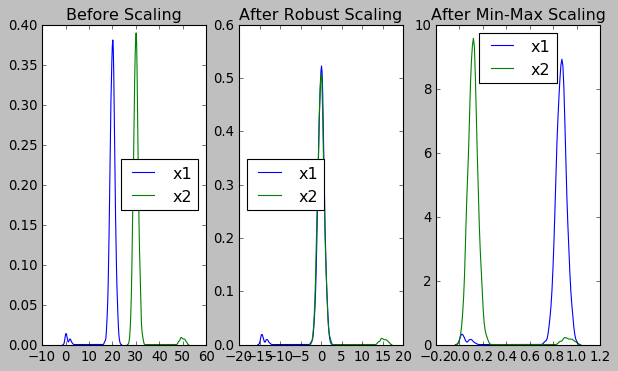

In [13]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

Notice that after Robust scaling, the distributions are brought into the same scale and overlap, but the outliers remain outside of bulk of the new distributions.

However, in Min-Max scaling, the two normal distributions are kept seperate by the outliers that are inside the 0-1 range.

## Normalizer
The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.

Say your features were x, y and z Cartesian co-ordinates your scaled value for x would be:

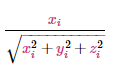

Each point is now within 1 unit of the origin on this Cartesian co-ordinate system.

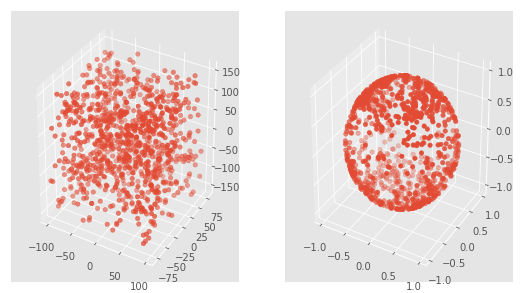

In [5]:
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()